![QuestionOne](images/q1.png)

In [1]:
import sympy as sp
x = sp.Symbol('x')
sp.integrate(x*sp.sin(x), (x, 0, sp.pi/2))

1

![QuestionTwo](images/q2.png)

In [2]:
import sympy as sp
a, b = sp.symbols('a b')
A = sp.Matrix([[1,2], [a,b]])
A_inv = sp.Inverse(A)
sp.pprint(sp.simplify(A*A_inv))

⎡1  0⎤
⎢    ⎥
⎣0  1⎦


![QuestionThree](images/q3.png)

In [1]:
import sympy as sp

def get_coefficient(N=4):
    """
    This function returns the numeric coefficient value
    of x^(N-1) for the expression (x+1)^N.
    """
    x = sp.Symbol('x')
    expression = sp.expand((x+1)**N)
    # The following list of coefficients are for x, x^2, x^3, ...
    coefficients = [expression.coeff(x**(n+1)) for n in range(N)]
    # Return the coefficient for x^(N-1), since index start at 0, an offset of 2
    return coefficients[N-2]

N=4
print(f"For N={N}, the coefficient of x^(N-1) is {get_coefficient(N)}")


For N=4, the coefficient of x^(N-1) is 4


![QuestionFour](images/q4.png)

In [2]:
import sympy as sp

def derive(N=2, x=0.1):
    """
    This function performs the Nth derivative of the function:
    f(x) = x^3sin(x^2+1) and returns the float value at a given
    x parameter.
    """
    X = sp.Symbol('x')
    expression = (X**3)*sp.sin((X**2) + 1)
    derivative = sp.diff(expression, X, N)
    numeric = sp.lambdify(X, derivative, "numpy")(x)
    return numeric

N=2
x=0.1
print(f"The N={N} derivate of f(x) at x={x} is {derive()}")

The N=2 derivate of f(x) at x=0.1 is 0.5155112835962654


![QuestionFive](images/q5.png)

In [3]:
import sympy as sp
x = sp.Symbol('x')
sp.series(sp.cos(sp.Pow(x,2) + sp.sqrt(x)), x, n=6, x0=0, dir="+").removeO()

x**(11/2)/5040 - x**(9/2)/120 + x**(7/2)/6 - x**(5/2) + 907199*x**5/3628800 - 20159*x**4/40320 - x**3/720 + x**2/24 - x/2 + 1

![QuestionSix](images/q6.png)

In [4]:
import sympy as sp

x, y = sp.symbols('x y')
a = sp.Symbol('a', integer=False, positive=True)

expression = (x**2)*sp.exp(-a*x)
# Find where the slope is zero.
slope = sp.Eq(y, sp.diff(expression, x, 1))
critical_points = sp.solve(slope.subs(y, 0), x)
# Second derivative test, if f''(c) < 0, then a maximum occurs at 
# the critical point.
second_derivative = sp.Eq(y, sp.diff(expression, x, 2))

for cp in critical_points:
    if sp.solve(second_derivative.subs(x, cp), y)[0] < 0:
        maximum = sp.solve(sp.Eq(y, expression.subs(x, cp)), y)     
sp.pprint(maximum[0])

   -2
4⋅ℯ  
─────
   2 
  a  


![QuestionSeven](images/q7.png)

Maximum point occurs at (x,y,z) = (4/3, 2/3, exp(4/3))


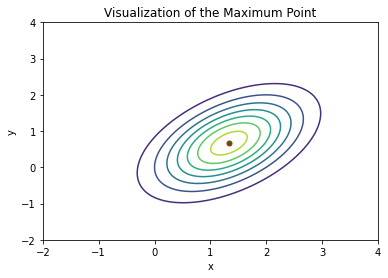

In [1]:
import sympy as sp

# Part 1
x, y, f = sp.symbols('x y f', real=True)
expression = sp.exp(-x**2 + 2*x - y**2 + x*y)

# Find the partial derivates with respect to x and y.
partial_x = sp.diff(expression, x)
partial_y = sp.diff(expression, y)
# x in relation to y as an equation used for substitution.
x_expression = sp.solve(sp.Eq(f, partial_x).subs(f, partial_y), x)
# Find the critical point.
critical_y = sp.solve(sp.Eq(0, partial_y).subs(x, x_expression[0]), y)
critical_x = sp.solve(sp.Eq(0, partial_x).subs(y, critical_y[0]), x)
# Find the maximum.
maximum = sp.solve(sp.Eq(f, expression).subs(x, critical_x[0])
                                       .subs(y, critical_y[0]), f)
print(f"Maximum point occurs at (x,y,z) = {(critical_x[0], critical_y[0], maximum[0])}")

# Part 2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 4, 200)
y = np.linspace(-2, 4, 200)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x, y)

f = np.exp(-np.square(X) + 2*X - np.square(Y) + X*Y)
fig, ax = plt.subplots(1, 1)

# plots contour lines
ax.contour(X, Y, f)
plt.plot(critical_x, critical_y, marker="o", markersize=7, markerfacecolor="red")
ax.set_title('Visualization of the Maximum Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()